In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
run_name = input()

 2048


In [3]:
# System imports
import os
import sys
import yaml

# External imports
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import auc
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from pytorch_lightning.loggers import TensorBoardLogger, WandbLogger
from pytorch_lightning import Trainer
import frnn
import wandb
import math
sys.path.append('../..')

from LightningModules.EdgeEmbedding.Models.vanilla_edge_embedding import VanillaEdgeEmbedding
from LightningModules.EdgeEmbedding.utils import build_neighbors_list

device = "cuda" if torch.cuda.is_available() else "cpu"
from pytorch_lightning.callbacks import ModelCheckpoint

In [4]:
def kaiming_init(model):
    for name, param in model.named_parameters():
        if name.endswith(".bias"):
            param.data.fill_(0)
        elif name.startswith("layers.0"):  # The first layer does not have ReLU applied on its input
            param.data.normal_(0, 1 / math.sqrt(param.shape[1]))
        else:
            param.data.normal_(0, math.sqrt(2) / math.sqrt(param.shape[1]))

## Sweep

In [5]:
with open("edge_embedding_sweep.yaml") as f:
        sweep_hparams = yaml.load(f, Loader=yaml.FullLoader)
with open("edge_embedding_default.yaml") as f:
        default_hparams = yaml.load(f, Loader=yaml.FullLoader)

In [6]:
sweep_configuration = {
    "name": run_name,
    "project": "ITk_barrell_edge_embedding",
    "metric": {"name": "pur", "goal": "maximize"},
    "method": "grid",
    "parameters": sweep_hparams
}

In [7]:
def training():
    wandb.init()
    model = VanillaEdgeEmbedding({**default_hparams, **wandb.config})
    kaiming_init(model)
    checkpoint_callback = ModelCheckpoint(
        monitor='pur',
        mode="max",
        save_top_k=2,
        save_last=True)

    logger = WandbLogger()
    trainer = Trainer(gpus=1, max_epochs=default_hparams["max_epochs"], log_every_n_steps = 10, logger=logger, callbacks=[checkpoint_callback], default_root_dir="/global/cfs/cdirs/m3443/usr/ryanliu/ITk_doublet_embedding/")
    trainer.fit(model)

In [ ]:
sweep_id = wandb.sweep(sweep_configuration, project = "ITk_barrel_edge_embedding")

# run the sweep
wandb.agent(sweep_id, function=training)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Create sweep with ID: 33ji11ma
Sweep URL: https://wandb.ai/exatrkx/ITk_barrel_edge_embedding/sweeps/33ji11ma


wandb: Agent Starting Run: gw9sey40 with config:
wandb: 	weight: 0.6
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: exatrkx (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/loggers/wandb.py:341: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
wandb: WARNING Config item 'weight' was locked by 'sweep' (ignored update).

  | Name          | Type             | Params
---------------------------------------------------
0 | cos           | CosineSimilarity | 0     
1 | input_layer1  | Linear           | 45.1 K
2 | input_layer2  | Linear           | 45.1 K
3 | layers1       | ModuleList       | 21.0 M
4 | layers2       | ModuleList       | 21.0 M
5 | output_layer1 | Linear           | 32.8 K
6 | output_layer2 | Linear           | 32.8 K
7 | act           | GELU

Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation sanity check:  50%|█████     | 1/2 [00:51<00:51, 51.29s/it]

/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/utilities/data.py:59: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  99%|█████████▉| 200/202 [12:24<00:07,  3.72s/it, loss=0.194, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 1:  99%|█████████▉| 200/202 [12:18<00:07,  3.69s/it, loss=0.182, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 2:  99%|█████████▉| 200/202 [12:33<00:07,  3.77s/it, loss=0.173, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 3:  99%|█████████▉| 200/202 [12:45<00:07,  3.83s/it, loss=0.181, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 4:  99%|█████████▉| 200/202 [13:23<00:08,  4.02s/it, loss=0.174, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 5:  99%|█████████▉| 200/202 [13:49<00:08,  4.15s/it, loss=0.174, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 6:  99%|█████████▉| 200/202 [12:57<00:07,  3.89s/it, loss=0.171, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 7:  99%|█████████▉| 200/202 [13:00<00:07,  3.90s/it, loss=0.173, v_num=ey40]
Validating: 0it [00:00, ?it/s]
Epoch 8:  99%|█████████▉| 200/202 [12:55<00:07,  3.88s/it, loss=0.171, v_num=ey40]
Valid

current_lr,█████████▃▃▃▃▃▃▃▃▃▃▁▁▁▁▁▁▁▁▁▁▁
dist@0.8,▆▃▁▆▂▄▅▆▁█▄▆▅▄▄▅▆▇▄▃▅▄▄▄▄▄▃▄█▅
eff,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇████
high_pt_triplets,█▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▂▁
mean_triplets,█▆▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▁▁▁▁▂▁
noise_triplets,█▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▂▁
pur,▁▂▃▃▃▃▃▄▄▃▄▅▅▅▅▅▅▅▅▆▆▇▇▇▇█▇█▆█
train_loss,█▇▅▄▅▅▅▆▄▅▃▃▄▅▂▄▃▃▃▃▂▂▁▂▃▃▂▂▂▂▂▂▂▁▁▂▂▁▁▁
trainer/global_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
current_lr,0.0


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: r4f0huc6 with config:
wandb: 	weight: 0.8
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: wandb version 0.12.11 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/loggers/wandb.py:341: UserWarning: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
  rank_zero_warn(
wandb: WARNING Config item 'weight' was locked by 'sweep' (ignored update).

  | Name          | Type             | Params
---------------------------------------------------
0 | cos           | CosineSimilarity | 0     
1 | input_layer1  | Linear           | 45.1 K
2 | input_layer2  | Linear           | 45.1 K
3 | layers1       | ModuleList       | 21.0 M
4 | layers2       | ModuleList       | 21.0 M
5 | output_layer1 | Linear           | 32.8 K
6 | output_layer2 | Linear           | 32.8 K
7 | act           | GELU

Validation sanity check:   0%|          | 0/2 [00:00<?, ?it/s]

/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/pytorch_lightning/trainer/data_loading.py:116: UserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 256 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 0:  99%|█████████▉| 200/202 [11:40<00:07,  3.50s/it, loss=0.194, v_num=huc6]
Validating: 0it [00:00, ?it/s]
Epoch 1:  65%|██████▍   | 131/202 [07:47<04:13,  3.57s/it, loss=0.183, v_num=huc6]

## Construct PyLightning model

In [ ]:
with open("edge_embedding_default.yaml") as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

In [ ]:
model = VanillaEdgeEmbedding(hparams)

## Metric Learning

### Train embedding

In [ ]:
from pytorch_lightning.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    monitor='pur',
    mode="max",
    save_top_k=2,
    save_last=True)

In [ ]:
kaiming_init(model)
logger = WandbLogger(project="ITk_edge_embedding")
trainer = Trainer(gpus=1, max_epochs=hparams["max_epochs"], logger=logger, num_sanity_val_steps=2, callbacks=[checkpoint_callback], log_every_n_steps = 10, default_root_dir="/global/cfs/cdirs/m3443/usr/ryanliu/ITk_embedding/")
trainer.fit(model)

## Data Visualization

In [2]:
checkpoint_path = "/global/cfs/cdirs/m3443/usr/ryanliu/ITk_doublet_embedding/ITk_barrel_edge_embedding/ung0y06n/checkpoints/last.ckpt"
checkpoint = torch.load(checkpoint_path)
model = VanillaEdgeEmbedding.load_from_checkpoint(checkpoint_path).to(device)
event = torch.load("/global/cfs/cdirs/m3443/usr/ryanliu/ITk_filter/filter_processed/test/10003").cuda()

In [3]:
input_data = model.get_input_data(event)

In [4]:
e_bidir = torch.cat(
            [event["modulewise_true_edges"],
             event["modulewise_true_edges"].flip(0)], axis=-1
        )
triplets = build_neighbors_list(event.pid, e_bidir)
counts = (triplets >= 0).sum(-1)
mask = counts >= 2
ind = torch.arange(len(event.pid), device = device)[mask]
triplets = triplets[mask, :2]
rand = torch.randperm(len(ind))
ind = ind[rand][:100]
triplets = triplets[rand][:100]
in_edges = torch.stack([ind, triplets[:,0]])
out_edges = torch.stack([ind, triplets[:,1]])

In [5]:
in_embedding = model(input_data, in_edges)
out_embedding = model(input_data, out_edges)

In [6]:
tsne = TSNE(2)
pca = PCA(2)

/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/global/homes/r/ryanliu/.conda/envs/gnn/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


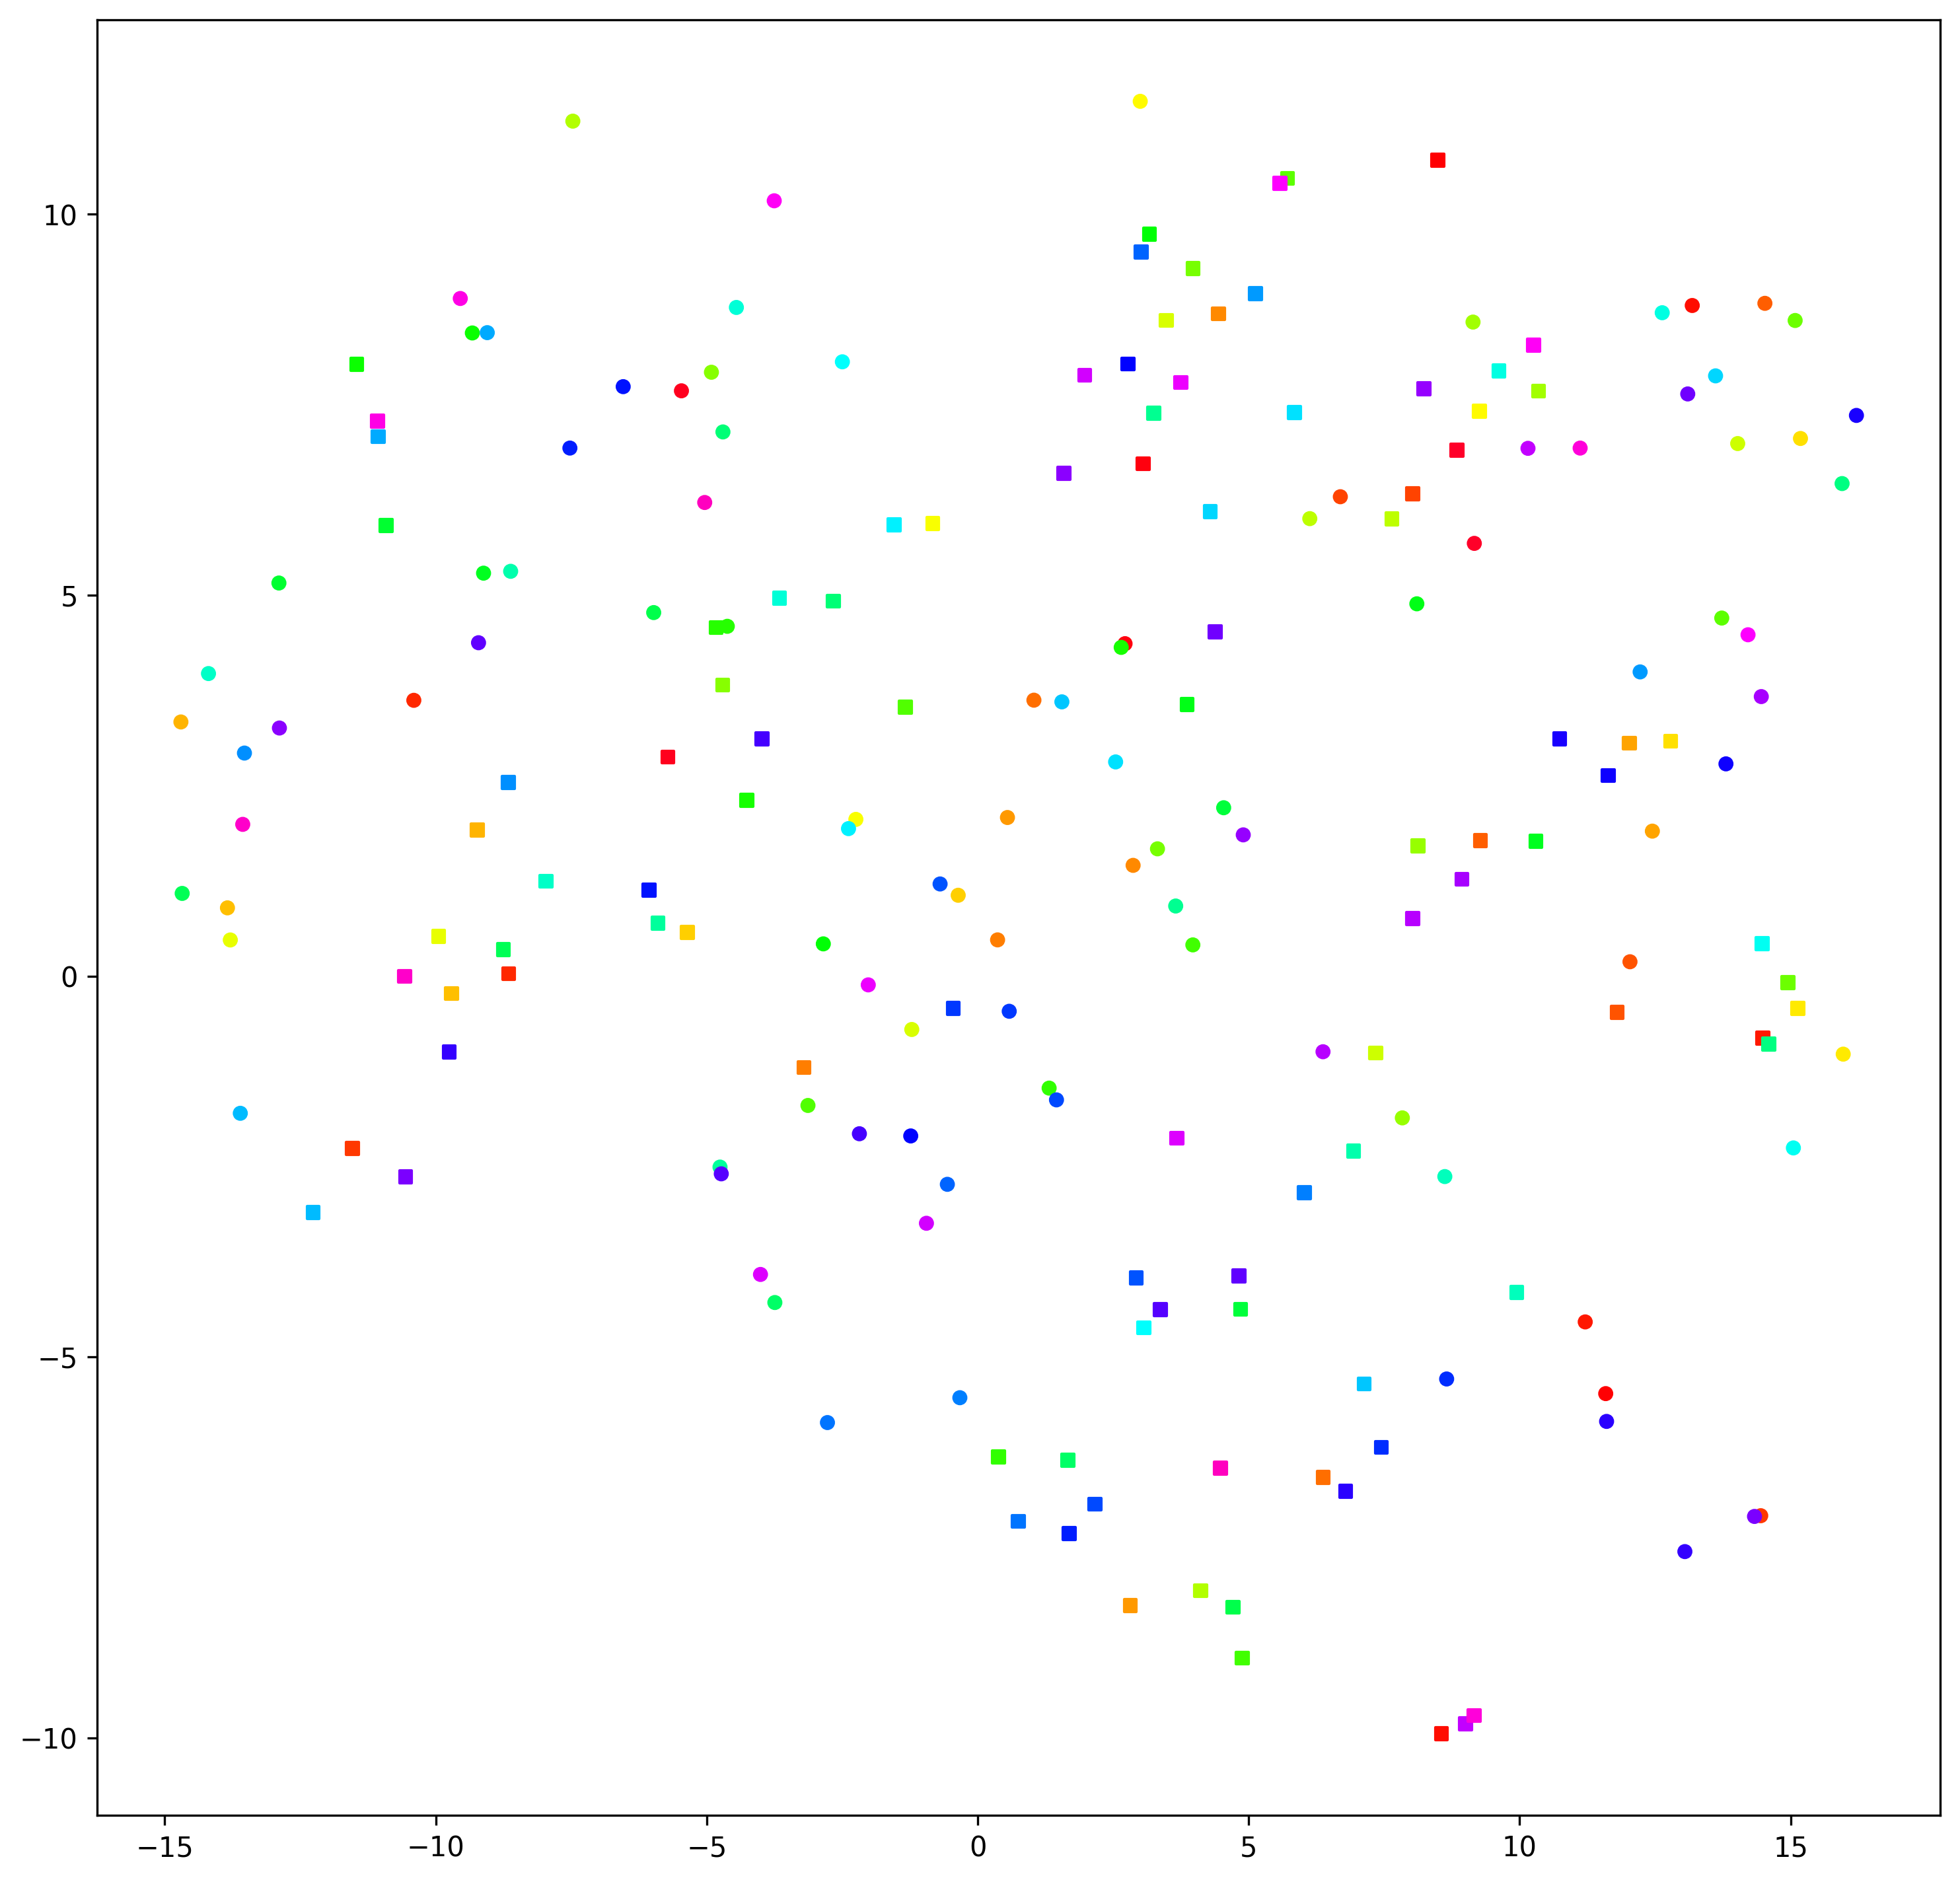

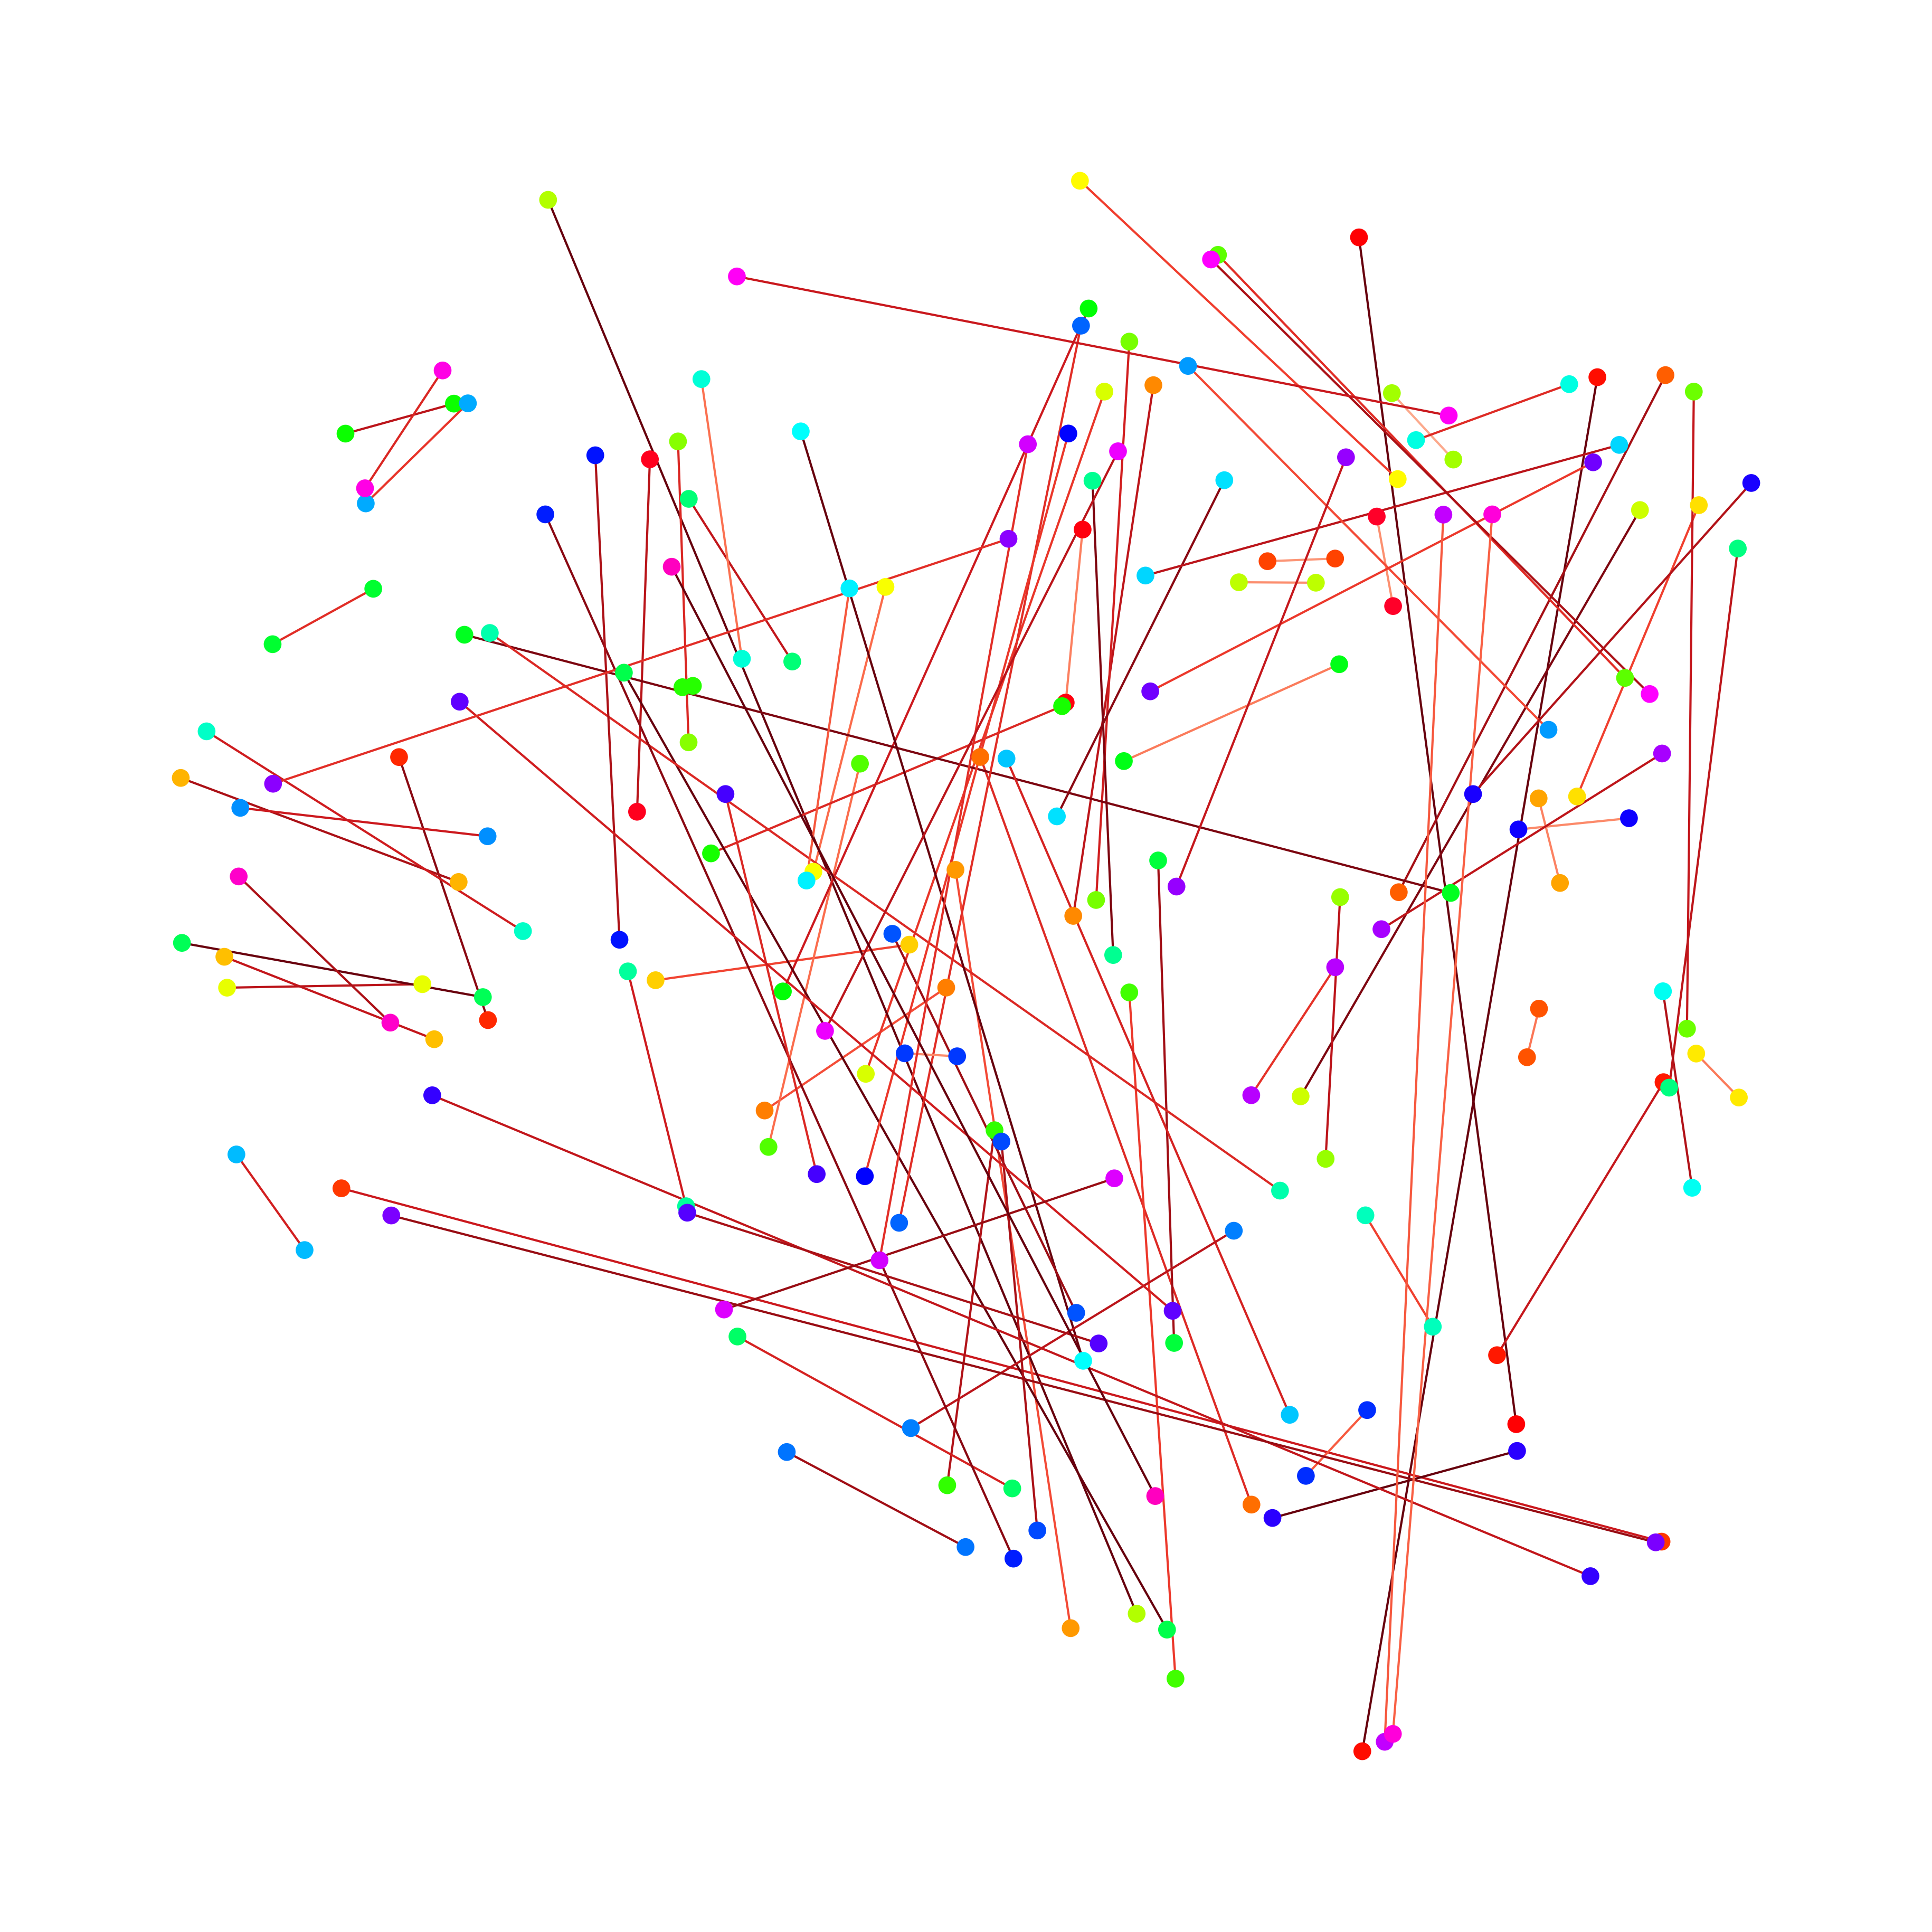

In [7]:
import matplotlib.cm as cm
from scipy import sparse
import networkx as nx
import numpy as np
colors = torch.linspace(0,1,len(in_embedding[0])).numpy()
colors = cm.gist_rainbow(colors)
colors = torch.tensor(colors, device = device)
colors = colors.cpu().detach().numpy()

latent = tsne.fit_transform(torch.cat([in_embedding[0], out_embedding[1]]).cpu().detach().numpy())
# latent = pca.fit_transform(torch.cat([in_embedding[0], out_embedding[1]]).cpu().detach().numpy())
plt.figure(figsize = (12,12), dpi = 300)
plt.scatter(*latent[:len(in_embedding[0])].T, color = colors, s = 20)
plt.scatter(*latent[len(in_embedding[0]):].T, color = colors, s = 20, marker = 's')
plt.show()

dist = torch.acos(torch.nn.CosineSimilarity()(in_embedding[0],out_embedding[1]))
dist = dist
edge_color = cm.Reds(dist.cpu().detach().numpy())

colors = np.concatenate([colors, colors])

G = nx.Graph()
length = int(len(latent)/2)
G.add_nodes_from(range(length))
G.add_edges_from(np.stack([np.arange(length), np.arange(length, 2*length)],axis = 1))
plt.figure(figsize=(12,12), dpi = 300)
nx.draw(G, pos=latent, node_color = colors, node_size = 50, edge_color = edge_color)
plt.draw()

In [30]:
event.idxs[event.idxs_scores < 0.296] = -1
counts = (event.idxs >= 0)
counts = counts.float().sum(-1)

In [21]:
print((counts*(counts-1)).mean())

tensor(1120.6766, device='cuda:0')


In [26]:
%%time
positive_idxs = event.idxs >= 0
e_found = torch.stack([torch.arange(len(event.pid), device = device).unsqueeze(1).expand(event.idxs.shape)[positive_idxs], event.idxs[positive_idxs]], dim = 0)
build_neighbors_list(event.pid, e_found)

CPU times: user 881 ms, sys: 968 ms, total: 1.85 s
Wall time: 1.71 s


tensor([[  718,   722,   730,  ...,    -1,    -1,    -1],
        [19578, 19587, 19616,  ...,    -1,    -1,    -1],
        [10683, 10684, 10691,  ...,    -1,    -1,    -1],
        ...,
        [98833, 98835, 98836,  ...,    -1,    -1,    -1],
        [98633, 98634, 98820,  ...,    -1,    -1,    -1],
        [98633, 98634, 98820,  ...,    -1,    -1,    -1]], device='cuda:0',
       dtype=torch.int32)